In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [ ]:
delta = 3
variation = 225
standard_deviation = variation ** 0.5
beta = 0.95
alpha = 1 - beta # alpha = 0.05 - уровень значимости, обратная величина от уровня доверия.

In [ ]:
level = 1 - alpha / 2
level

0.975

In [ ]:
import scipy.stats as st
Zalpha = round(st.norm.ppf(0.975 ), 2) # Одностороннее табличное значение для уровня = 0.0975
Zalpha

1.96

In [ ]:
n = int(((standard_deviation * Zalpha) / delta )**2)
print(f' Минимальная выборка должна состоять из {n} семплов для построения интервальной оценки среднего')


 Минимальная выборка должна состоять из 96 семплов для построения интервальной оценки среднего


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [ ]:
def len_confidentatil_interval(n, mean_value, sigma, z):
    """
    Функция рассчитывает длину доверительного интервала (разницу между правым и левым концом), окруленную до целого.
    На вход функция принимает следующие параметры:

    n - размер выборки
    mean_value - ср.зн. количественного признака
    sigma - стандартное отклонение выборки
    z - квантиль нормального распределения
    """
    se = sigma / n ** 0.5  # Стандартная ошибка среднего

    left_bound = mean_value - z * se
    right_bound =  mean_value + z * se

    len_ci = round(right_bound - left_bound)

    print(f'Нижняя граница интервала: {left_bound}, верхняя граница: {right_bound}')
    print(f'Длина полученого интервала (разница между правым и леваым концом): {int(len_ci)} ед.')


In [ ]:
n = 25
mean_value = 130
sigma = 15
alpha = 0.02
level  = 1 - alpha / 2
Zalpha = round(st.norm.ppf(level), 2)
Zalpha

2.33

In [ ]:
len_confidentatil_interval(n, mean_value, sigma, Zalpha)

Нижняя граница интервала: 123.01, верхняя граница: 136.99
Длина полученого интервала (разница между правым и леваым концом): 14 ед.


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

Сформируем гипотезы:

H0: средний рост у мужчин и женщин одинаковый

H1: средний рост между мужчинами и женщинами различается

Здесь нам уже нужен двухвыборочный двухсторонний критерий.

По условию задания alpha принимаем 0.001

In [ ]:

np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

# Принменяю T-test для несвязанных выборок

t, p_value = stats.ttest_ind(mens, womens, equal_var=False) # Ставлю поправку на случай, если дисперсии не равны. Даже если они равны это никак не ухудшить результат (об этом рассказывал Олег Бульгин)
t, p_value

alpha = 0.001

if (p_value < alpha):
    print(f'p-value:{round(p_value, 5)} vs alpha: {alpha}')
    print('-------------------------------')
    print(f'Мы получили p-value < alpha и, таким образом, мы отклоняем нулевую гипотезу, то есть, средние значения роста между мужчинами и женщинами различаются и это различие статистически значимо на уровне значимости alpha = 0.001')
else:
    print('Не отвергаем нулевую гипотезу')


p-value:0.00025 vs alpha: 0.001
-------------------------------
Мы получили p-value < alpha и, таким образом, мы отклоняем нулевую гипотезу, то есть, средние значения роста между мужчинами и женщинами различаются и это различие статистически значимо на уровне значимости alpha = 0.001


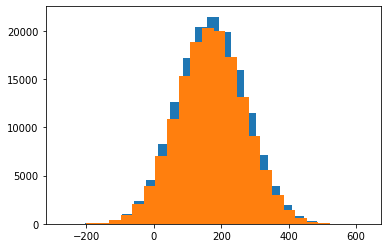

In [ ]:
# plt.figure(figsize=(12, 7))
plt.hist(mens, bins=25);
plt.hist(womens, bins=25);

### <b>Задание № 3</b>
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [ ]:
delta = 50
sigma = 150
beta = 0.95
alpha = (1-beta) # alpha урровень значимости - обратная величина от уровня доверия.
z = 1.96  #  %   # Квантиль нормального распределения для уровня значимости alpha = 0.05

n = round(((sigma * z) / delta )**2)
print(f' Минимальная выборка должна состоять из {n} семплов')

 Минимальная выборка должна состоять из 35 семплов


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [ ]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


Выдвинем гипотезы:

H0: Отсутствуют статистически значимые отличия между двумя группами
H1: Наблюдаются статистически значимые различия в сторону правилных ответов волшебника (односторонний критерий).

In [ ]:
import scipy as spy


oddsratio, pvalue = spy.stats.fisher_exact(observations)

oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

В данном случае P-value > 0.05 , в связи с чем мы принимаем нулевую гипотезу и делаем вывод об отсутствии статистически значимых различиях в пользу того, что маг умеет предсказывать погоду с уровнем значимости alpha = 5%.





<div class="alert alert-info">
<b>Задание № 5</b>

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [ ]:
import math
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]


def mean_confidence_interval(data, confidence=0.90):
    avg = np.mean(data)
    std =  np.std(data, ddof = 1) #
    Zalpha = stats.norm.ppf((1 + confidence) / 2)

    delta = std * Zalpha / len(data)**0.5

    return round(avg - delta, 2), round(avg + delta, 2)

print('Доверительный интервал c уровнем доверия beta = 0.9:', mean_confidence_interval(data, 0.90))

Доверительный интервал c уровнем доверия beta = 0.9: (6.09, 7.17)


Задание № 6
Принадлежат ли выборки A и B одному множеству?

Оцените это с помощью известных вам тестов для проверок статистических гипотез;
Покажите различия визуально.

In [ ]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]



Когда отправлял задание, этот код еще был не дописан, поэтому в ЛК я задал вопрос. В любом случае интересно какие еще есть подходы для решения данной задачи? :)

Решение 1.

Пробую применить алгоритм, который считает частоты значений в обеих выборках, а потом сравниваю эти частоты с помощью критерия Хи-квадрат.  

In [ ]:
# Оценим объем обеих выборок

len_A = len(A)
len_B = len(B)

print(f' Кол-во семплов в A: {len_A}')
print(f' Кол-во семплов в B: {len_B}')

 Кол-во семплов в A: 112
 Кол-во семплов в B: 95


In [ ]:
# Приведем объем выборок к одному размеру. Отберем из выборки А слуайным образом столько элементов, сколько и выборке B.

A = np.random.choice(A, len(B))

len_A = len(A)
len_B = len(B)

print(f' Кол-во семплов в A: {len_A}')
print(f' Кол-во семплов в B: {len_B}')

 Кол-во семплов в A: 95
 Кол-во семплов в B: 95


In [ ]:
# Считаю частотность вхождения каждой цифры в выборку A и B

d_a = {}
d_b = {}

for item in A:
  if item in d_a:
    d_a[item] = d_a.get(item) + 1
  else:
    d_a[item] = 1

for item in B:
  if item in d_b:
    d_b[item] = d_b.get(item) + 1
  else:
    d_b[item] = 1

print(d_a)
print(d_b)


{7: 20, 5: 16, 6: 25, 9: 6, 8: 21, 4: 7}
{5: 20, 6: 9, 7: 4, 8: 2, 4: 28, 2: 8, 3: 22, 1: 2}


In [ ]:
# Формирую единый датафрейм с значениями и соответствующими частотами по выборке А и B

df1 = pd.DataFrame(d_a, index=[0]).T.reset_index()
df1 = df1.rename(columns={'index': 'num_A', 0:'freq_A'})

df2 = pd.DataFrame(d_b, index=[0]).T.reset_index()
df2 = df2.rename(columns={'index': 'num_B', 0:'freq_B'})

merge_data = df1.merge(df2, left_on='num_A', right_on='num_B', how='outer')
merge_data



,num_A,freq_A,num_B,freq_B
0,7.0,20.0,7.0,4.0
1,5.0,16.0,5.0,20.0
2,6.0,25.0,6.0,9.0
3,9.0,6.0,NaN,NaN
4,8.0,21.0,8.0,2.0
5,4.0,7.0,4.0,28.0
6,NaN,NaN,2.0,8.0
7,NaN,NaN,3.0,22.0
8,NaN,NaN,1.0,2.0


In [ ]:
# Отсутствующие значения частот заменяю на 0 в столбцах Freq_A и Freq_B.

merge_data['freq_A'] = merge_data.freq_A.fillna(value=0)
merge_data['freq_B'] = merge_data.freq_B.fillna(value=0)

merge_data

,num_A,freq_A,num_B,freq_B
0,7.0,20.0,7.0,4.0
1,5.0,16.0,5.0,20.0
2,6.0,25.0,6.0,9.0
3,9.0,6.0,NaN,0.0
4,8.0,21.0,8.0,2.0
5,4.0,7.0,4.0,28.0
6,NaN,0.0,2.0,8.0
7,NaN,0.0,3.0,22.0
8,NaN,0.0,1.0,2.0


In [ ]:
# Формирую новую колонку, которая содержит все уникальные значения из обоих выборок.
# считаю по ней частоты freq_A и Freq_B:

def change_null_value(row):
  if row['freq_B'] == 0:
    return row['num_A']
  else:
    return row['num_B']

merge_data['num_in_both_sets'] = merge_data.apply(change_null_value, axis=1)
merge_data

,num_A,freq_A,num_B,freq_B,num_in_both_sets
0,7.0,20.0,7.0,4.0,7.0
1,5.0,16.0,5.0,20.0,5.0
2,6.0,25.0,6.0,9.0,6.0
3,9.0,6.0,NaN,0.0,9.0
4,8.0,21.0,8.0,2.0,8.0
5,4.0,7.0,4.0,28.0,4.0
6,NaN,0.0,2.0,8.0,2.0
7,NaN,0.0,3.0,22.0,3.0
8,NaN,0.0,1.0,2.0,1.0


In [ ]:
merge_data['num_in_both_sets'] = merge_data['num_in_both_sets'].astype(int)
merge_data['freq_A'] = merge_data['freq_A'].astype(int)
merge_data['freq_B'] = merge_data['freq_B'].astype(int)

contingency_table = merge_data[ ['num_in_both_sets', 'freq_A', 'freq_B']]
contingency_table

,num_in_both_sets,freq_A,freq_B
0,7,20,4
1,5,16,20
2,6,25,9
3,9,6,0
4,8,21,2
5,4,7,28
6,2,0,8
7,3,0,22
8,1,0,2


Пояснение на примере первой строчки: мы получили, что число 6 попадало в первую выборку (А) 22 раза, а в выборку (B) 9 раз.

Вписываются ли набюдаемые частоты в пределы естественных отклонений от ожидаемых частот?

Перенесем данный вопрос в термины проверки гипотез:

 - H0: Наблюдается согласие наблюдаемых частот
 - H1: полученные частоты из разных генеральных совокупностей

In [ ]:
contingency_table['freq_A'].values

array([20, 16, 25,  6, 21,  7,  0,  0,  0])

In [ ]:
#Критерий Пирсона (хи квадрат)

chi, pval, dof, exp = stats.chi2_contingency([contingency_table['freq_A'].values, contingency_table['freq_B'].values])

significance = 0.05
print('p-value=%.18f, significance=%.2f\n' % (pval, significance))

p-value=0.000000000000004936, significance=0.05



Вывод: Получаем крайне низкое p-value, а значит, выборки из разных гс.

Решение № 2

In [ ]:
# Проверим объем выборок

len_A = len(A)
len_B = len(B)

print(f' Кол-во семплов в A: {len_A}')
print(f' Кол-во семплов в B: {len_B}')

 Кол-во семплов в A: 112
 Кол-во семплов в B: 95


In [ ]:
# Приведем выборки к однинаковму размеру, для этого в выборке А оставим столько же элементов, сколько и в выборке B:
A_resized = np.random.choice(A, len(B))
len(A_resized)

95

In [ ]:
# Мы предполагаем, что выборки принадлежат одному множеству, следовательно, эти выборки должны быть свявзанными, а значит используем парные тесты.
# Проверим равенство средних через критерий согласия Стюдента. Для связных выборок используем: scipy.stats.ttest_rel

res = stats.ttest_rel(A_resized, B)
print(f'p-value: {res[1]}')

p-value: 3.1584295814620577e-19


p-value получилось очень низким (p_v = 4.17e-19), следовательно, средние значения выборок сильно различаются, что свидетельствует о том, что выборки не принадлежат одному множеству. Даже на уровне значимости 0.01 гипотеза будет отвергнута.

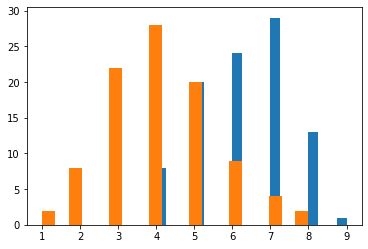

In [ ]:
# Проверим это визуально
plt.hist(A_resized, bins=20);
plt.hist(B, bins=20)
plt.show()

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

**Решение**:

P-value = 0.03 - это пограничный случай при уровне значимости alpha = 0.05. В большинстве задач нет цели получить полностью идеальное, академическое нормальное распределение в данных, поэтому я бы сделал допущение и стал с таким распределением работать как с нормальным. При уровне значимости alpha = 0.01 мы уже не могли отвергнуть H0, подразумевая, что распределение нормальное.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы?
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

In [ ]:
# Применяю двухсторонний T-test

t, p_value = stats.ttest_ind(A, B, equal_var=False)

t, round(p_value, 2)

(-1.95300880485141, 0.05)

p_value Находится на уровне значимости alpha = 0.05. Мы получили пограничное значение, в силу специфики задачи целесооразно не отклонять нулевую гипотезу, т.к в противном случае мы можем сделать неправильный выод о эффекте лекарства и от этого потенциально могут пострадать больные при переходе на новое лекарство. При минимальном значении p-value = 0.01 отличия были бы значимы.

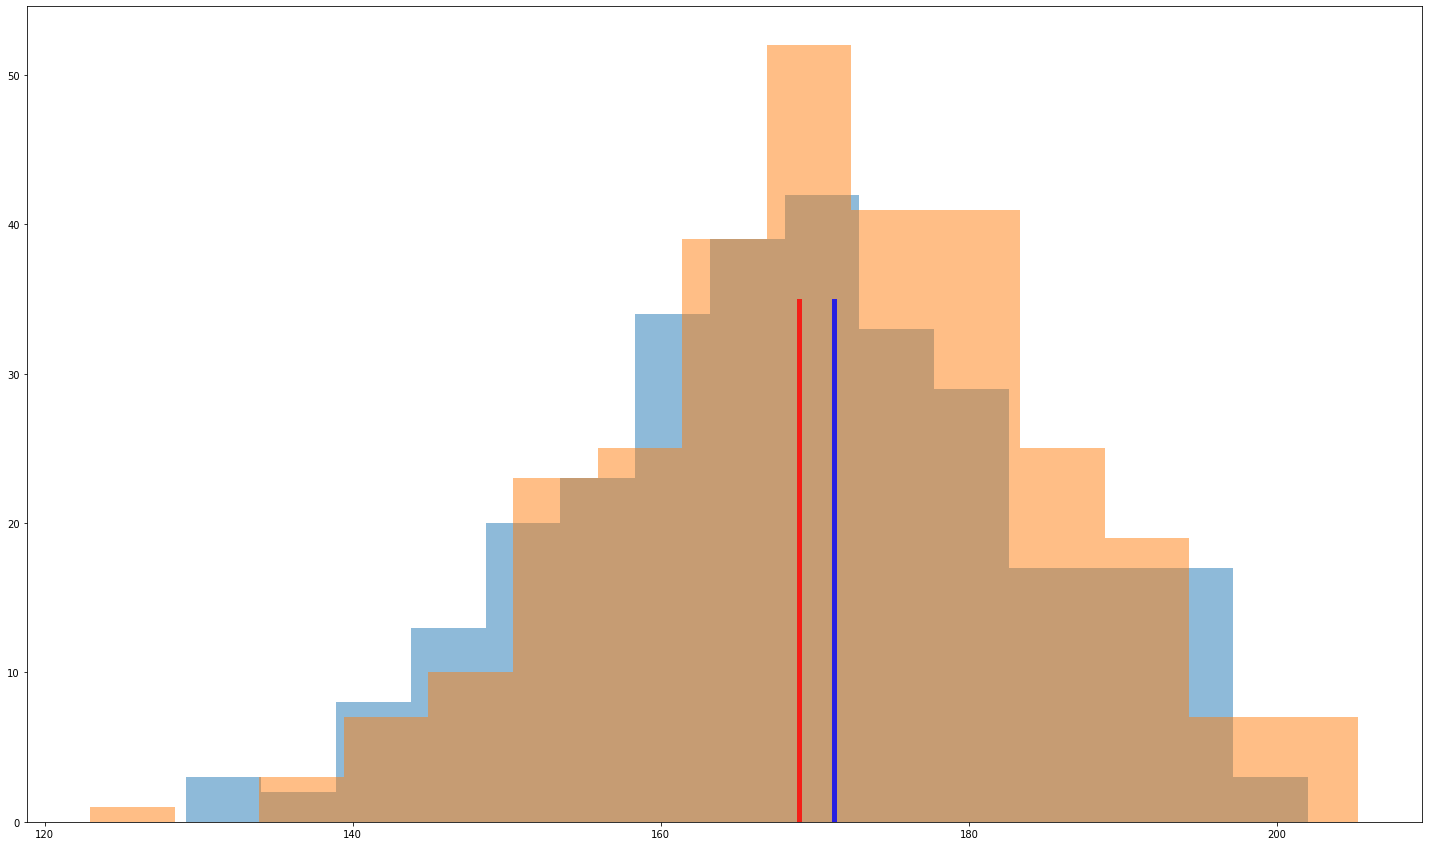

In [ ]:
plt.figure(figsize=(25, 15))
plt.hist(A, bins=15, alpha=0.5)
plt.hist(B, bins=15, alpha=0.5)
plt.bar(A.mean(), 35, alpha=0.8, color='red', width=0.3, linestyle= 'dashed')
plt.bar(B.mean(), 35, alpha=0.8, color='blue',width=0.3, linestyle='dashed')
plt.show()

In [ ]:
print(f'Среднее значение выборки А: {A.mean()}')
print(f'Среднее значение выборки B: {B.mean()}')

Среднее значение выборки А: 168.99662278483498
Среднее значение выборки B: 171.27935065741218


Из графика незаметно значимого отличия в средних значениях по двум выборкам